In [2]:
# !pip install savReaderWriter

  Stored in directory: C:\Users\tmznq\AppData\Local\pip\Cache\wheels\cc\c5\c2\25171e344dff66668d68736623515b77ecda30dc399270c9ed
Successfully built savReaderWriter


In [201]:
import pandas as pd 
import numpy as np
import savReaderWriter as spss 
import matplotlib.pyplot as plt
with spss.SavReaderNp("C:/Users/tmznq/workspace/ml_scratch/dataset/seoulcoding/MLRA.sav") as reader: 
    records = reader.all() 
    df = pd.DataFrame(records)

df.head()

,id,age,wgt,oxygen,runtime,rstpulse,runpulse,maxpulse
0,1.0,44.0,89.47,44.61,11.37,62.0,178.0,182.0
1,2.0,40.0,75.07,45.31,10.07,62.0,185.0,185.0
2,3.0,44.0,85.84,54.30,8.65,45.0,156.0,168.0
3,4.0,42.0,68.15,59.57,8.17,40.0,166.0,172.0
4,5.0,38.0,89.02,49.87,9.22,55.0,178.0,180.0


In [202]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize

## 2장 실습 1
MLRA.sav는 SPSS 데이터셋이다. 이 데이터셋을 이용하여 다중선형회귀를 구현한다.
- 설명변수: age, weight, runtime(1.5마일 달릴 때 걸리는 시간), rstpulse(휴식시 평균 맥박수), runpulse(달릴 때의 평균 맥박수), maxpulse(달릴 때의 최대 맥박 수)
- 종속변수: oxygen(산소 흡수율)

In [203]:
df.head()

,id,age,wgt,oxygen,runtime,rstpulse,runpulse,maxpulse
0,1.0,44.0,89.47,44.61,11.37,62.0,178.0,182.0
1,2.0,40.0,75.07,45.31,10.07,62.0,185.0,185.0
2,3.0,44.0,85.84,54.30,8.65,45.0,156.0,168.0
3,4.0,42.0,68.15,59.57,8.17,40.0,166.0,172.0
4,5.0,38.0,89.02,49.87,9.22,55.0,178.0,180.0


In [204]:
# 1. Z-score standarize

In [205]:
X_scale = scale(df[['age', 'wgt', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']])
df[['age', 'wgt', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']] = X_scale
df.head()

,id,age,wgt,oxygen,runtime,rstpulse,runpulse,maxpulse
0,1.0,-0.717308,1.467751,44.61,0.574255,1.140463,0.828419,0.912450
1,2.0,-1.497537,-0.289818,45.31,-0.378502,1.140463,1.522501,1.245226
2,3.0,-0.717308,1.024697,54.30,-1.419207,-1.127552,-1.352978,-0.640504
3,4.0,-1.107422,-1.134427,59.57,-1.770994,-1.794615,-0.361434,-0.196803
4,5.0,-1.887651,1.412827,49.87,-1.001459,0.206574,0.828419,0.690599


- 각각의 column의 평균이 0, 분산을 1로 고정

In [160]:
# 정규화
# 값이 0과 1사이 일 때
# X_normalize = normalize(df[['age', 'wgt', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']])
# df[['age', 'wgt', 'runtime', 'rstpulse', 'runpulse', 'maxpulse']] = X_normalize
# df

In [158]:
# 2. 데이터 구분

In [233]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['id', 'oxygen'], axis = 1), df.oxygen, random_state=0)

In [162]:
# 3. KNNregression

In [250]:
# n_neighbors = 3
reg = KNeighborsRegressor(n_neighbors=10)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [251]:
reg.score(X_test, y_test)

0.5211112068032053

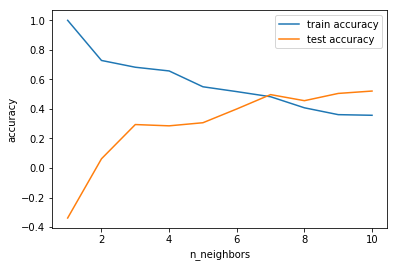

In [252]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(reg.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(reg.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

___

In [287]:
# 임의의 데이터 실습 (scale 안 된 것.)

In [288]:
# scale 안 된 데이터는 올바르게 동작하지 않는다.
# 따라서 새로운 데이터도 scale을 거친 후에 모델에 넣어줘야 제대로 작동한다.
X_new3 = np.array([[44.0, 85.84, 8.65, 45.0, 156.0, 168.0]])
reg.predict(X_new3)

array([45.275])

In [289]:
X_new2 = np.array([[-0.717308, 1.024697, -1.419207, -1.127552, -1.352978, -0.640504]])
X_new2.shape

(1, 6)

In [290]:
reg.predict(X_new2)

array([51.515])

In [291]:
X_test.head()

,age,wgt,runtime,rstpulse,runpulse,maxpulse
2,-0.717308,1.024697,-1.419207,-1.127552,-1.352978,-0.640504
29,0.062922,-1.977816,0.669531,-0.193664,0.035184,0.246898
13,-0.132136,0.208160,0.009929,-0.860727,-0.758052,-1.084205
10,-0.717308,-0.538807,-0.334529,-1.127552,-0.163125,-0.640504
27,1.818437,-2.241452,-0.481107,-0.593901,-2.146214,-2.082533


In [282]:
# 데이터 뽑아서 실습 (scale 된 것.)

In [286]:
print(X_test.loc[2])
print(X_test.iloc[0])

age        -0.717308
wgt         1.024697
runtime    -1.419207
rstpulse   -1.127552
runpulse   -1.352978
maxpulse   -0.640504
Name: 2, dtype: float64
age        -0.717308
wgt         1.024697
runtime    -1.419207
rstpulse   -1.127552
runpulse   -1.352978
maxpulse   -0.640504
Name: 2, dtype: float64


In [283]:
np.array(X_test.loc[2]).reshape(1, -1).shape

(1, 6)

In [284]:
X_new = np.array(X_test.iloc[0]).reshape(1, -1)
reg.predict(X_new)

array([51.515])